In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Load the data

### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import cv2

import warnings
warnings.filterwarnings('ignore')

In [7]:
DATADIR = "/kaggle/input/potato-dataset" # This is my base dir

CATEGORIES = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy'] # Make sure to use the same order as you have in the foldre dir

Join the paths accordingly, to make a good path to the image that we want to see and use to operate upon

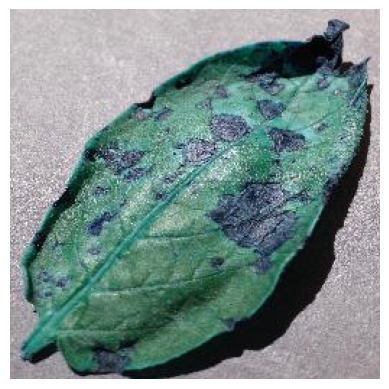

In [17]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Constructing the path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.axis("off")
        break
    break

In [19]:
img_array

# this is big image, you can identify by just watching the values

array([[[198, 191, 194],
        [198, 191, 194],
        [197, 190, 193],
        ...,
        [189, 178, 180],
        [197, 186, 188],
        [201, 190, 192]],

       [[198, 191, 194],
        [197, 190, 193],
        [197, 190, 193],
        ...,
        [186, 175, 177],
        [196, 185, 187],
        [201, 190, 192]],

       [[196, 189, 192],
        [195, 188, 191],
        [195, 188, 191],
        ...,
        [184, 173, 175],
        [194, 183, 185],
        [199, 188, 190]],

       ...,

       [[155, 146, 156],
        [154, 145, 155],
        [152, 143, 153],
        ...,
        [155, 144, 147],
        [153, 142, 145],
        [154, 143, 146]],

       [[157, 146, 156],
        [154, 143, 153],
        [152, 141, 151],
        ...,
        [156, 145, 148],
        [158, 147, 150],
        [161, 150, 153]],

       [[154, 143, 153],
        [151, 140, 150],
        [149, 138, 148],
        ...,
        [155, 144, 147],
        [161, 150, 153],
        [169, 158, 161]]

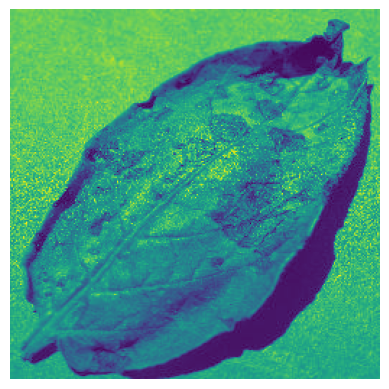

In [13]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Constructing the path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.axis("off")
        break
    break

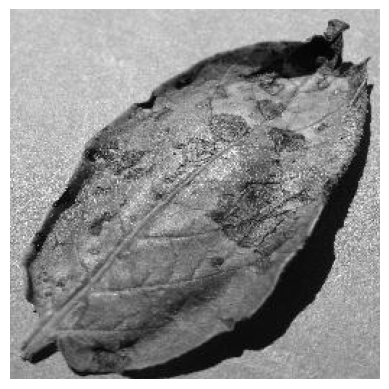

In [21]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # Constructing the path
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.axis("off")
        break
    break

In [22]:
img_array

# this has small size, unlike RGB image

array([[193, 193, 192, ..., 180, 188, 192],
       [193, 192, 192, ..., 177, 187, 192],
       [191, 190, 190, ..., 175, 185, 190],
       ...,
       [150, 149, 147, ..., 146, 144, 145],
       [150, 147, 145, ..., 147, 149, 152],
       [147, 144, 142, ..., 146, 152, 160]], dtype=uint8)

In [23]:
img_array.shape

(256, 256)

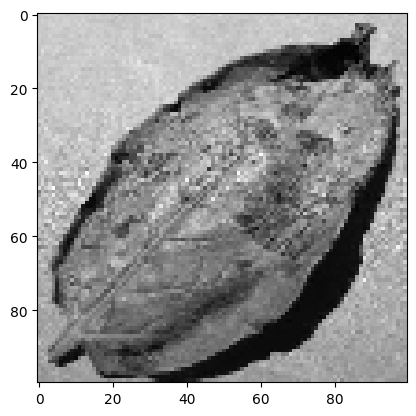

In [27]:
IMG_SIZE  = 100

new_array = cv2.resize(img_array, [IMG_SIZE, IMG_SIZE])
plt.imshow(new_array, cmap='gray')

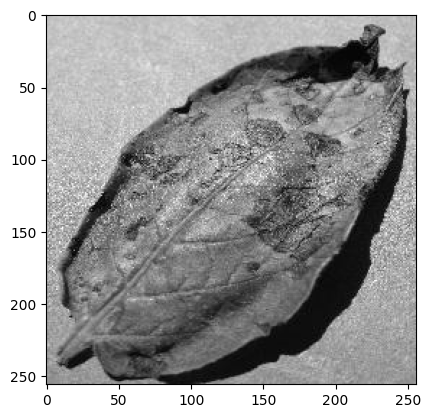

In [26]:
IMG_SIZE  = 256

new_array = cv2.resize(img_array, [IMG_SIZE, IMG_SIZE])
plt.imshow(new_array, cmap='gray')

# FOUND THE BEST IMAGE SIZE

## 2. Create a training data

In [36]:
training_data = []
IMG_SIZE = 256

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # Constructing the path
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, [IMG_SIZE, IMG_SIZE])
                training_data.append([new_array, class_num])
                
            except Exception as e:
                pass

In [37]:
create_training_data()

In [38]:
len(training_data)

2152

### Shuffle the data

the data is sequential and it is straight forward, need to shuffle the data


In [39]:
import random

random.shuffle(training_data)

In [40]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [41]:
type(X), type(y)

(list, list)

In [43]:
# Convert the data from list to numpy array

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [45]:
type(X), type(y)

# done the requirements

(numpy.ndarray, numpy.ndarray)

## 3. Data normalization

In [46]:
X

array([[[[136],
         [143],
         [129],
         ...,
         [160],
         [159],
         [159]],

        [[153],
         [164],
         [153],
         ...,
         [162],
         [162],
         [162]],

        [[153],
         [160],
         [143],
         ...,
         [162],
         [163],
         [164]],

        ...,

        [[128],
         [125],
         [127],
         ...,
         [177],
         [176],
         [178]],

        [[134],
         [125],
         [120],
         ...,
         [176],
         [175],
         [178]],

        [[139],
         [125],
         [115],
         ...,
         [177],
         [179],
         [184]]],


       [[[123],
         [126],
         [136],
         ...,
         [147],
         [143],
         [143]],

        [[133],
         [133],
         [135],
         ...,
         [156],
         [149],
         [137]],

        [[132],
         [136],
         [141],
         ...,
         [158],
         [

In [49]:
X = X/255
X

array([[[[0.0020915 ],
         [0.00219915],
         [0.00198385],
         ...,
         [0.00246059],
         [0.00244521],
         [0.00244521]],

        [[0.00235294],
         [0.00252211],
         [0.00235294],
         ...,
         [0.00249135],
         [0.00249135],
         [0.00249135]],

        [[0.00235294],
         [0.00246059],
         [0.00219915],
         ...,
         [0.00249135],
         [0.00250673],
         [0.00252211]],

        ...,

        [[0.00196847],
         [0.00192234],
         [0.00195309],
         ...,
         [0.00272203],
         [0.00270665],
         [0.00273741]],

        [[0.00206075],
         [0.00192234],
         [0.00184544],
         ...,
         [0.00270665],
         [0.00269127],
         [0.00273741]],

        [[0.00213764],
         [0.00192234],
         [0.00176855],
         ...,
         [0.00272203],
         [0.00275279],
         [0.00282968]]],


       [[[0.00189158],
         [0.00193772],
         [0.00

In [50]:
X.shape

(2152, 256, 256, 1)

## 4. Build the model

In [58]:
model = keras.Sequential([
    # Convolution layers
    keras.layers.Conv2D(64, kernel_size = (3, 3), input_shape = X.shape[1:], activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),

    # Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3, activation='softmax'),
    
])

model.compile(
    optimizer = "adam",
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [59]:
import numpy as np
from keras.utils import to_categorical

num_classes = 3 
y_one_hot = to_categorical(y, num_classes=num_classes)

print(f"Original y shape: {y.shape}") 
print(f"New y shape: {y_one_hot.shape}")

# Then fit the model using the new labels
model.fit(X, y_one_hot, epochs=5, batch_size=32, validation_split=0.1)

Original y shape: (2152,)
New y shape: (2152, 3)
Epoch 1/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 157s 3s/step - accuracy: 0.4624 - loss: 0.9406 - val_accuracy: 0.4907 - val_loss: 0.9051
Epoch 2/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.4644 - loss: 0.9083 - val_accuracy: 0.4352 - val_loss: 0.9172
Epoch 3/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.4861 - loss: 0.9186 - val_accuracy: 0.4907 - val_loss: 0.9061
Epoch 4/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4426 - loss: 0.8960 - val_accuracy: 0.4352 - val_loss: 0.9075
Epoch 5/5
61/61 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4516 - loss: 0.9082 - val_accuracy: 0.4352 - val_loss: 0.9253


In [61]:
history = model.fit(
    X, 
    y_one_hot, 
    epochs=7, 
    batch_size=32, 
    validation_split=0.1
)

Epoch 1/7
61/61 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.4705 - loss: 0.9053 - val_accuracy: 0.4352 - val_loss: 0.9090
Epoch 2/7
61/61 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.4525 - loss: 0.9177 - val_accuracy: 0.4352 - val_loss: 0.9069
Epoch 3/7
61/61 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4840 - loss: 0.9221 - val_accuracy: 0.4907 - val_loss: 0.9059
Epoch 4/7
61/61 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.4765 - loss: 0.8771 - val_accuracy: 0.4352 - val_loss: 0.9074
Epoch 5/7
61/61 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4608 - loss: 0.9075 - val_accuracy: 0.4352 - val_loss: 0.9219
Epoch 6/7
61/61 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.4440 - loss: 0.9232 - val_accuracy: 0.4352 - val_loss: 0.9061
Epoch 7/7
61/61 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.4801 - loss: 0.8997 - val_accuracy: 0.4907 - val_loss: 0.9090


### Plotting Accuracy vs. Epochs

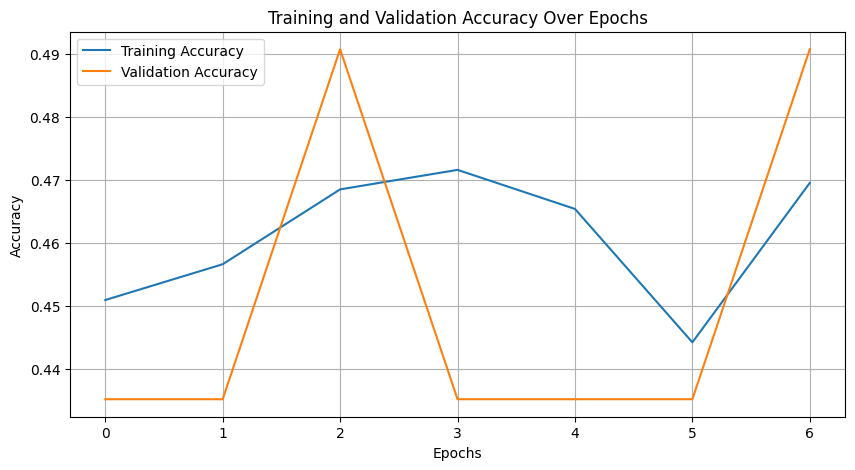

In [63]:
plt.figure(figsize = (10, 5))

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot( history.history['val_accuracy'], label="Validation Accuracy")

plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.grid()
plt.show()

### Plotting Loss vs. Epochs

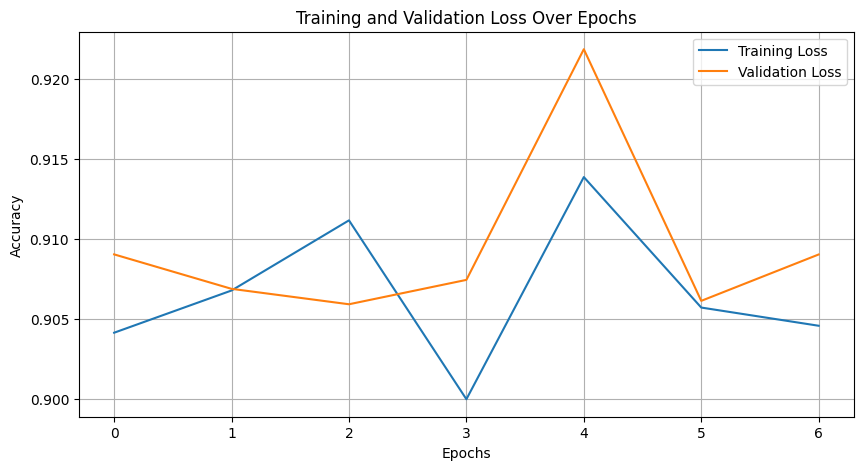

In [64]:
plt.figure(figsize = (10, 5))

plt.plot(history.history['loss'], label="Training Loss")
plt.plot( history.history['val_loss'], label="Validation Loss")

plt.title('Training and Validation Loss Over Epochs')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.grid()
plt.show()